In [48]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set_style("darkgrid")

In [49]:
# Read the csv file into a dataframe
df = pd.read_csv('../datasets/customers.csv')

# Print out the first 5 rows of the dataframe
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [50]:
col1, col2 = 3, 4
X = df.iloc[:, [col1, col2]].values
x_axis_column = df.columns[col1]
y_axis_column = df.columns[col2]

# Kmeans

In [51]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

silhouette_scores = []
wcss = []

for i in range(2, 11):  # silhouette score needs at least 2 clusters
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    labels = kmeans.fit_predict(X)
    score = silhouette_score(X, labels)
    wcss.append(kmeans.inertia_)
    silhouette_scores.append(score)

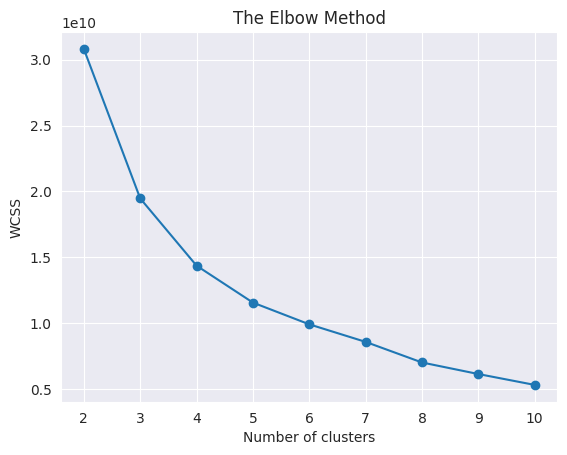

In [52]:
plt.plot(range(2, 11), wcss, marker="o")
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
# plt.savefig("WCSS.png", dpi=100, bbox_inches='tight')
plt.show()

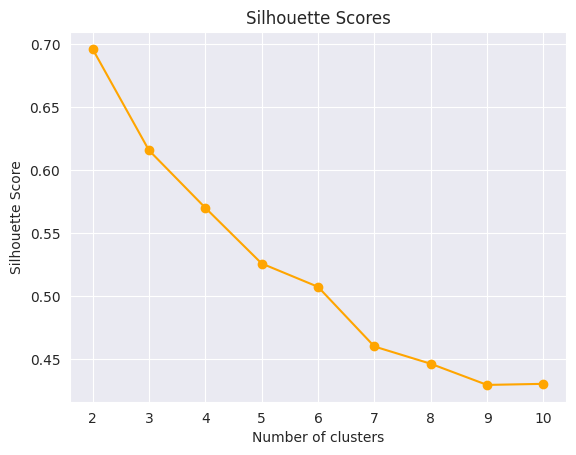

In [53]:
plt.plot(range(2, 11), silhouette_scores, marker='o', color='orange')
plt.title('Silhouette Scores')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
# plt.savefig("Silhouette.png", dpi=100, bbox_inches='tight')
plt.show()

In [54]:
kmeans = KMeans(n_clusters = 2, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

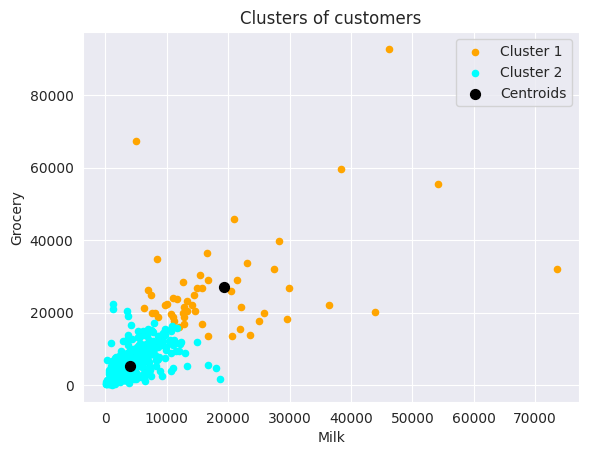

In [55]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 20, c = 'orange', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 20, c = 'cyan', label = 'Cluster 2')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 50, c = 'black', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel(x_axis_column)
plt.ylabel(y_axis_column)
plt.legend()
plt.show()

# Hierarchical

In [56]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

silhouette_scores = []

for i in range(2, 11):  # silhouette score needs at least 2 clusters
    hc = AgglomerativeClustering(n_clusters = i, metric = 'euclidean', linkage = 'ward')
    labels = hc.fit_predict(X)
    score = silhouette_score(X, labels)

    silhouette_scores.append(score)

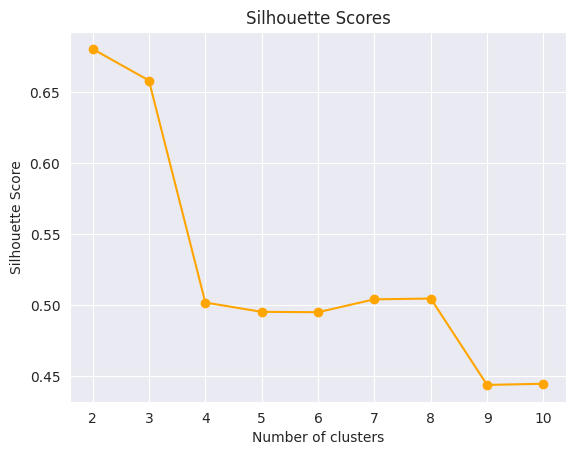

In [57]:
plt.plot(range(2, 11), silhouette_scores, marker='o', color='orange')
plt.title('Silhouette Scores')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()

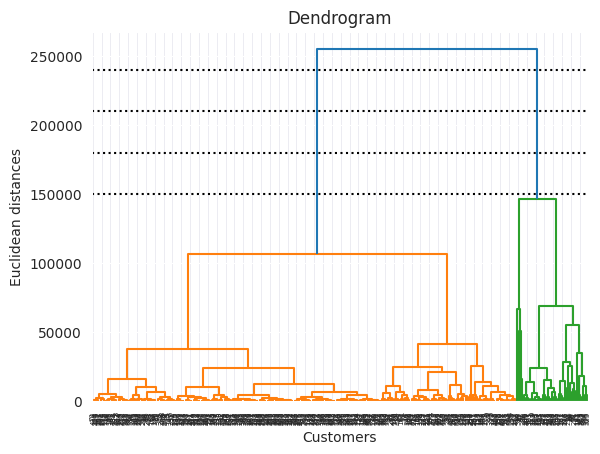

In [58]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.axhline(y=150000, color="black", linestyle=":")
plt.axhline(y=180000, color="black", linestyle=":")
plt.axhline(y=210000, color="black", linestyle=":")
plt.axhline(y=240000, color="black", linestyle=":")
plt.show()

In [59]:
hc = AgglomerativeClustering(n_clusters = 2, metric = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

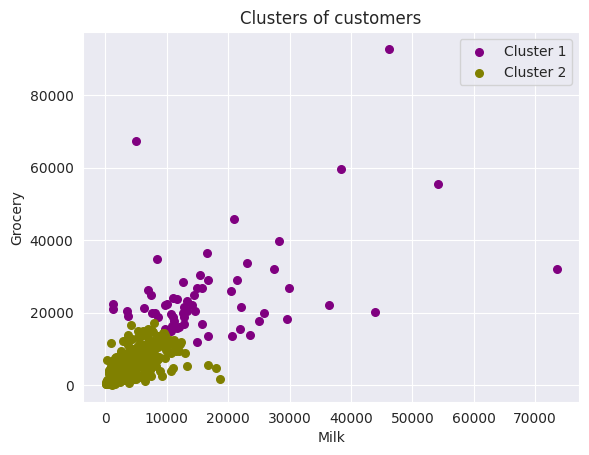

In [60]:
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 30, c = 'purple', label = 'Cluster 1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 30, c = 'olive', label = 'Cluster 2')

plt.title('Clusters of customers')
plt.xlabel(x_axis_column)
plt.ylabel(y_axis_column)
plt.legend()
plt.show()